<a href="https://colab.research.google.com/github/kulkarnisatishp/genai-course/blob/main/AI_Product_Manager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%cd /content/drive/MyDrive/GenAI/AI Agents/Capstone Project - the AI Product Manager

/content/drive/MyDrive/GenAI/AI Agents/Capstone Project - the AI Product Manager


In [1]:
!pip install crewai
!pip install 'crewai[tools]'
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.0/463.0 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from google.colab import userdata
openai_api_key = userdata.get('openai_key')
serperapi_key = userdata.get('serperapi_key')

In [4]:
import os
from PIL import Image
from crewai_tools import VisionTool
from crewai import Agent, Task, Crew, Process
from langchain_openai import ChatOpenAI
from IPython.display import display, Markdown

In [5]:
os.environ['OPENAI_API_KEY'] = openai_api_key
os.environ['SERPER_API_KEY'] = serperapi_key

In [6]:
vision_tool = VisionTool()

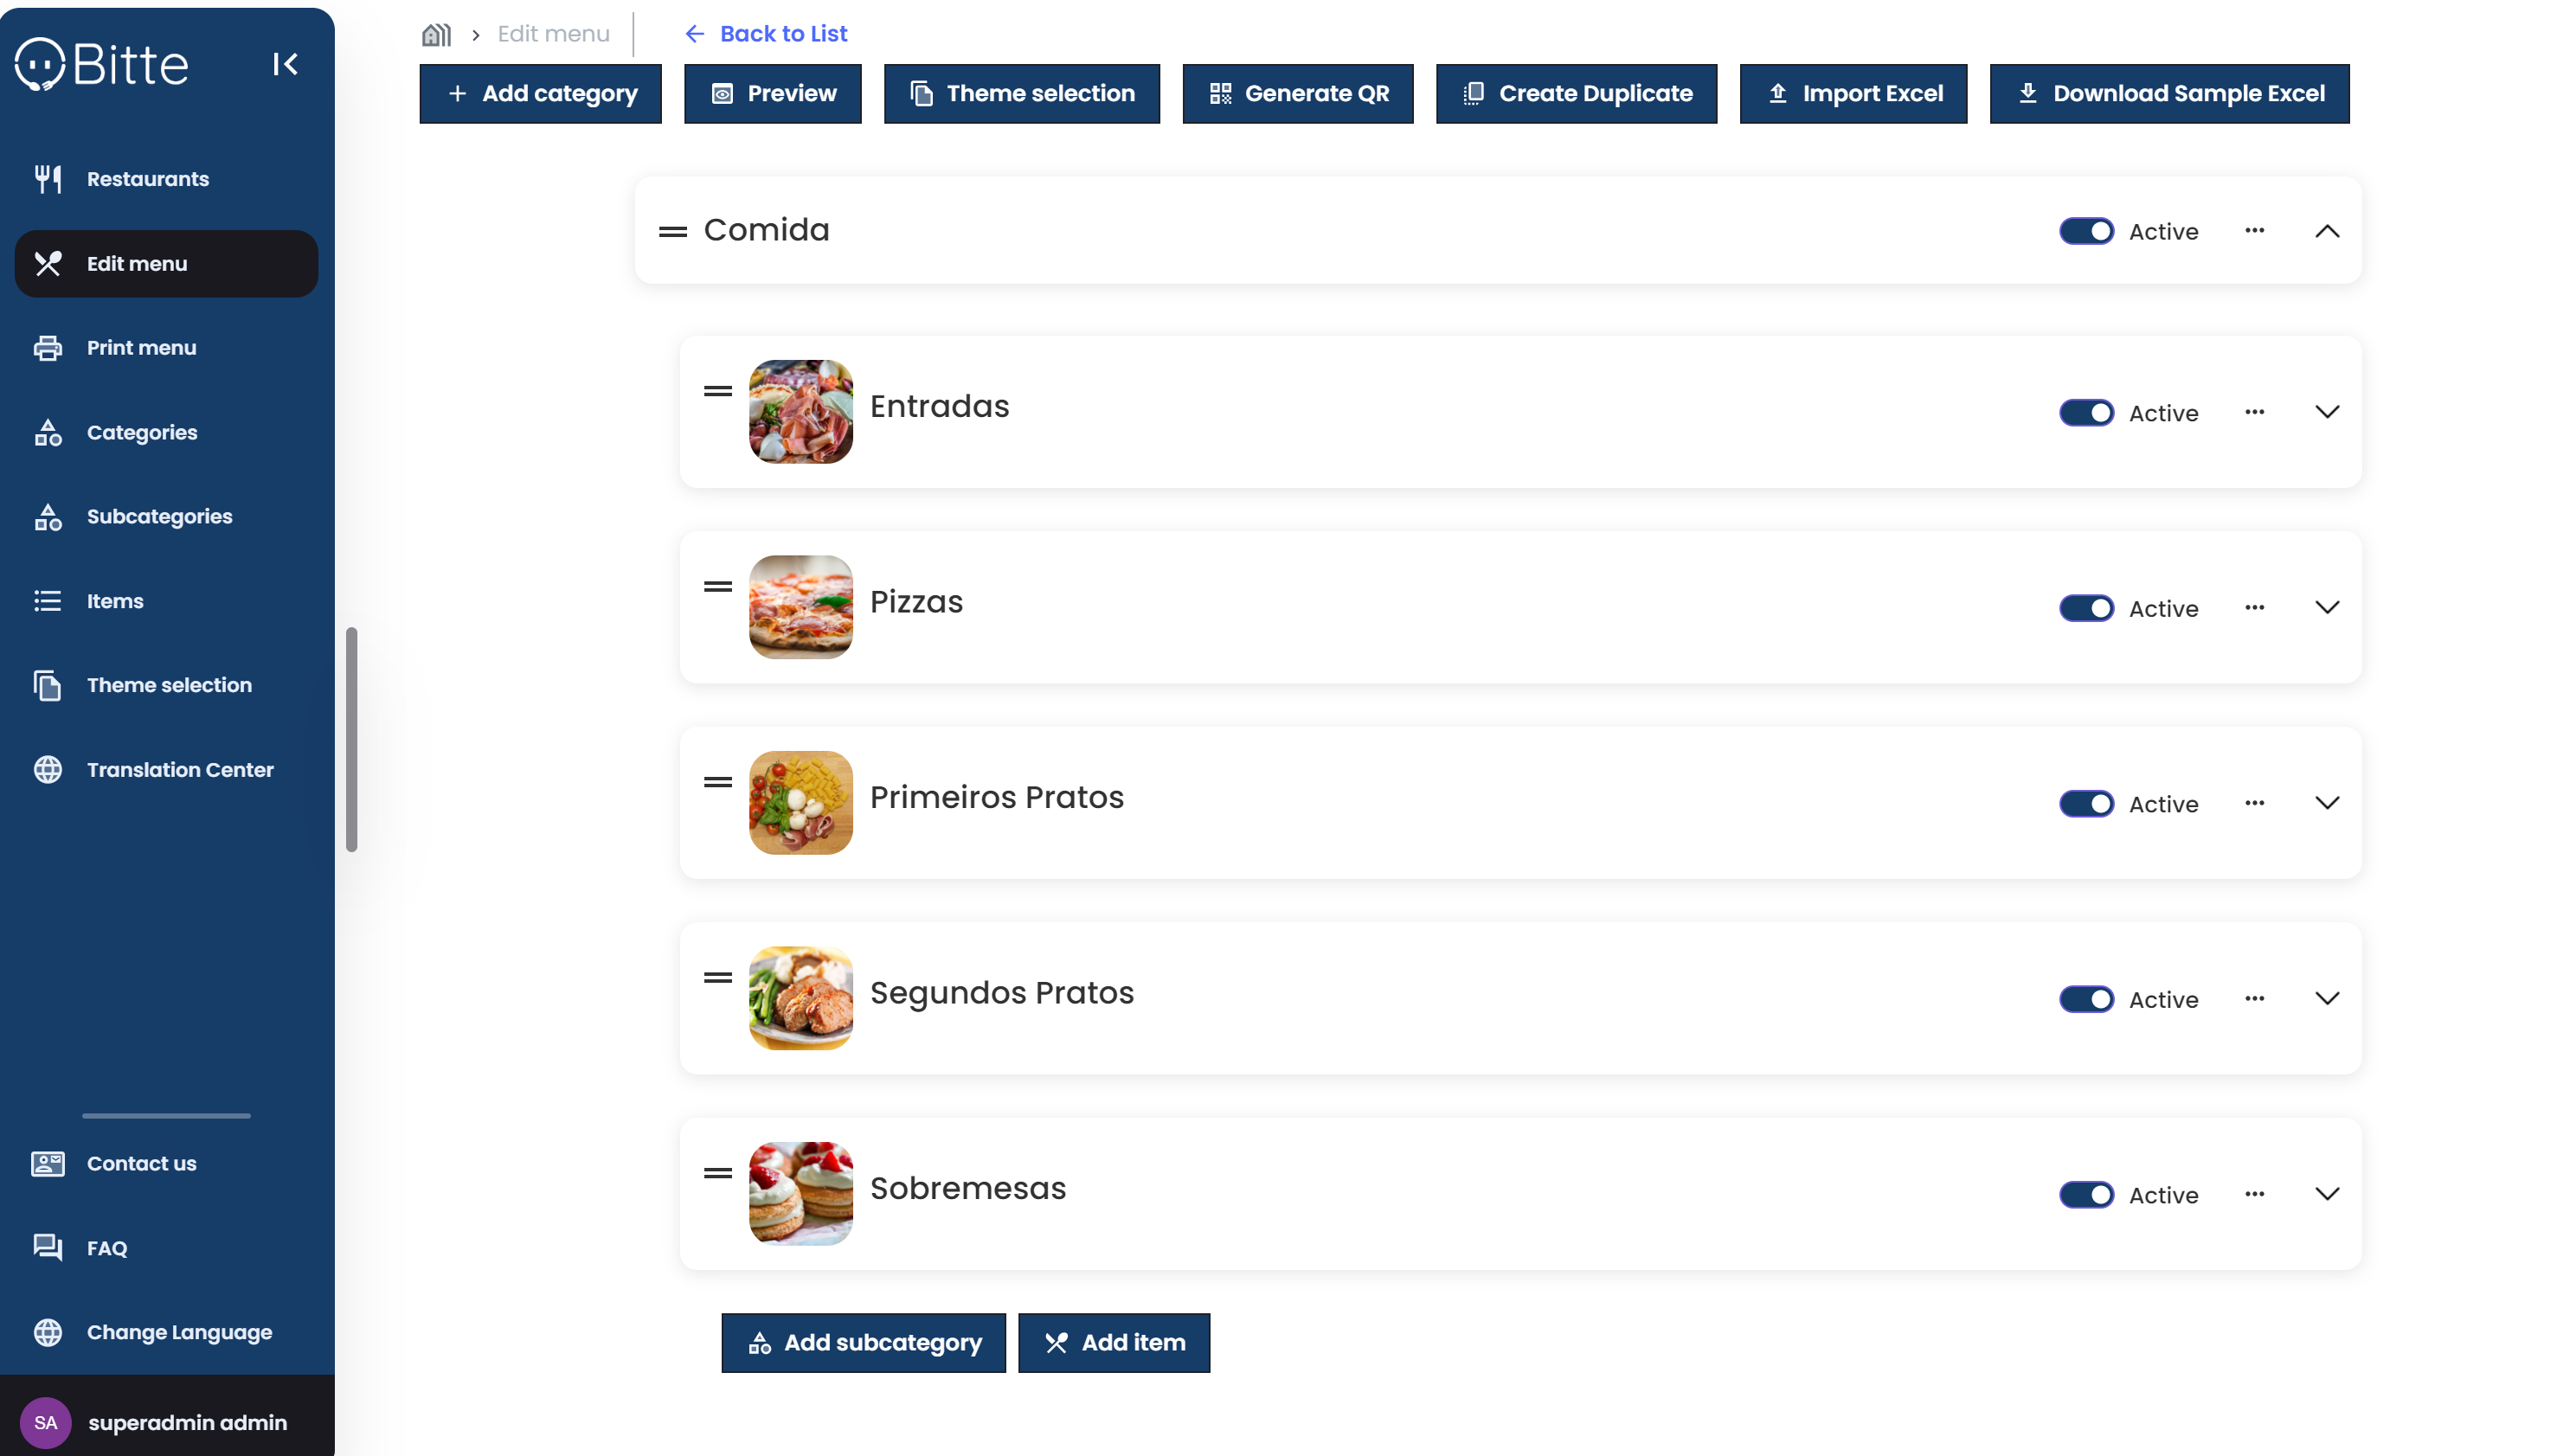

In [7]:
image_path = "menu.png"
image = Image.open(image_path)
display(image)

In [8]:
description_agent = Agent(
    role="Image Description Agent",
    goal=f"Fully describe the digital image ({image_path}), of a B2B Digital Menu startup, including its visible elements, design, and intended purpose.",
    backstory="You are responsible for analyzing images and describing their purpose in detail.",
    verbose=True,
    tools=[vision_tool],
    llm=ChatOpenAI(model_name="gpt-4o", temperature=0.8)
)

In [9]:
# Create the description task assigned to the description agent
description_task = Task(
    description="Identify and fully describe the digital image and explain its purpose.",
    expected_output="A complete description of the image and its purpose.",
    agent=description_agent
)

In [10]:
critique_agent = Agent(
    role="UX Critique Agent",
    goal=f"Critique the image {image_path} based on its description and intended purpose provided by the Image Description Agent.",
    backstory="You critically evaluate images, specifically UX designs, and point out flaws, weaknesses, and areas of improvement.",
    verbose=True,
    tools=[vision_tool],
    llm=ChatOpenAI(model_name="gpt-4o", temperature=0.8)
)

In [11]:
critique_task = Task(
    description="Critically analyze the image based on its description and intended purpose.",
    expected_output="A complete critique of the image, highlighting design flaws and areas of improvement.",
    agent=critique_agent,
    context=[description_task]
)

In [13]:
ux_agent = Agent(
    role="UX Suggestion Agent",
    goal=f"Provide design and layout suggestions for the image {image_path} based on the context from the Image Description Agent and UX Critique Agent.",
    backstory="You specialize in providing actionable suggestions to improve the design of website images.",
    verbose=True,
    tools=[vision_tool],
    llm=ChatOpenAI(model_name="gpt-4o", temperature=0.8)
)

In [14]:
ux_task = Task(
    description="Provide suggestions for improving the image design and layout, based on the context from the description and critique agents.",
    expected_output="A list of actionable suggestions for improving the image design and layout based on the image's purpose and critiques.",
    agent=ux_agent,
    context=[description_task, critique_task]
)

In [16]:
pm_agent = Agent(
    role="AI Product Manager",
    goal=f"Write user stories based on the suggestions from the UX agent for the image {image_path} and prioritize the suggestions based on probable customer feedback.",
    backstory="You act as a product manager for a digital company, prioritizing suggestions and creating user stories to guide improvements.",
    verbose=True,
    tools=[vision_tool],
    llm=ChatOpenAI(model_name="gpt-4o", temperature=0.8)
)

In [17]:
pm_task = Task(
    description="Write user stories based on the suggestions from the UX agent for the image and prioritize the suggestions based on probable customer feedback.",
    expected_output="A list of prioritized improvements based on expected impact on the customer, and the user stories.",
    agent=pm_agent,
    context=[description_task, critique_task, ux_task]
)

In [18]:
crew = Crew(
    agents=[description_agent, critique_agent, ux_agent, pm_agent],
    tasks=[description_task, critique_task, ux_task, pm_task],
    verbose=True,
    process=Process.sequential
)

result = crew.kickoff()

# Agent: Image Description Agent
## Task: Identify and fully describe the digital image and explain its purpose.


# Agent: Image Description Agent
## Using tool: Vision Tool
## Tool Input: 
"{\"image_path_url\": \"menu.png\"}"
## Tool Output: 
The image shows a user interface for a restaurant menu editing application. It contains categories related to food, labeled as follows:

- Entradas (Appetizers)
- Pizzas
- Primeiros Pratos (First Courses)
- Segundos Pratos (Second Courses)
- Sobremesas (Desserts)

There are options to add categories, preview the menu, generate a QR code, create duplicates, import an Excel file, and download a sample Excel file. The sidebar includes navigation options for managing restaurants and menu items, as well as contact and language settings.


# Agent: Image Description Agent
## Final Answer: 
The image depicts a user interface of a digital menu editing application, likely targeted towards restaurants looking to digitize their menus. The interface is orga

In [19]:
for idx, task_output in enumerate(result.tasks_output):
  display(Markdown(f"### Agent {idx+1}: {task_output.agent}\n{task_output.raw}"))

### Agent 1: Image Description Agent
The image depicts a user interface of a digital menu editing application, likely targeted towards restaurants looking to digitize their menus. The interface is organized into several key areas that enhance usability and streamline menu management:

1. **Categories Section**: The main content area is divided into various food categories, which in this example include:
   - Entradas (Appetizers)
   - Pizzas
   - Primeiros Pratos (First Courses)
   - Segundos Pratos (Second Courses)
   - Sobremesas (Desserts)

   These categories indicate that the application allows the restaurant to organize their menu items into logical groupings, making it easier for customers to browse.

2. **Functional Options**:
   - There are options to add new categories, allowing for flexible tailoring of the menu to the restaurant's needs.
   - A 'preview' function suggests that users can see how the menu will appear to customers before finalizing it.
   - QR Code generation is available, indicating a focus on contactless menu access, which is increasingly relevant for hygiene and convenience.
   - Options to duplicate menus can help in creating consistent menu variations or seasonal menus without starting from scratch.
   - Importing and downloading Excel files are supported, which aids in bulk uploads or downloads for easier data management.

3. **Sidebar Navigation**:
   - The sidebar includes navigation links for managing restaurants and menu items, suggesting that the platform might support multiple locations or brands under one user interface.
   - Contact and language settings imply an international or diverse client base, allowing for customization according to different regions or languages.

**Intended Purpose**: 
The purpose of this digital menu startup is to provide restaurants with an easy-to-use, flexible platform for managing and displaying their menus digitally. By offering features like category management, QR code generation, and Excel file integration, the application aims to streamline the process of menu creation and maintenance. This is particularly useful for businesses looking to modernize their customer interaction by providing digital menus that can be accessed via smartphones, enhancing the dining experience through convenience and hygiene. The ability to manage multiple restaurants and language settings indicates an intention to cater to a wide and varied customer base, making it suitable for both local and international restaurants.

### Agent 2: UX Critique Agent
Critique of the Digital Menu Editing Application Interface:

1. **Category Organization and Usability**:
   - The division of menu items into clear categories such as "Entradas", "Pizzas", "Primeiros Pratos", "Segundos Pratos", and "Sobremesas" is beneficial for organization. However, the application should allow for customization of these terms to accommodate non-traditional or themed restaurants that may use different terminology.
   - The interface needs to ensure ease of navigation between these categories. Consider incorporating a search function or filter options to enhance user experience, especially for menus with a large number of items.

2. **Functional Options**:
   - While the ability to add new categories is a strength, the interface should provide visual cues or prompts to guide less tech-savvy users through the process.
   - The preview function is useful, but it would be advantageous to offer a live preview or side-by-side comparison to visualize changes in real-time.
   - QR Code generation is a modern feature; however, it should be more integrated into the menu design process, potentially allowing customization of QR code designs to fit the restaurant’s branding.
   - Duplication of menus is practical, yet the interface should outline the duplication process clearly to prevent errors. Adding a version control or rollback feature would improve menu management.
   - Excel file integration is valuable, but the interface should ensure that the import process is intuitive, possibly with templates or guided steps to prevent errors during data input.

3. **Sidebar Navigation**:
   - The sidebar seems cluttered with options. A more hierarchical or collapsible design might reduce overwhelm and allow users to focus on specific tasks.
   - Offering tooltips or brief descriptions for each sidebar option could enhance understanding and ease of use for first-time users.
   - Contact and language settings are crucial for international restaurants, but they should be readily accessible and easy to modify without navigating away from the main tasks.

4. **Design and Aesthetics**:
   - The overall aesthetic of the interface should align with modern design principles, ensuring it is not only functional but also visually appealing. This includes choosing a pleasing color scheme, readable fonts, and intuitive iconography.
   - Consider implementing a dark mode or theme variations to cater to user preferences, which can also reduce eye strain during prolonged use.

5. **Overall Functionality and User Experience**:
   - While the application offers robust features, the user experience could be further enhanced by providing tutorials or onboarding guides.
   - Regular updates and user feedback mechanisms should be integrated to continuously improve the application based on user needs and technological advancements.

In conclusion, while the digital menu editing application provides essential features for modernizing menu management, there is room for improvement in customization, user guidance, and design aesthetics to ensure it meets the diverse needs of its restaurant clientele effectively.

### Agent 3: UX Suggestion Agent
1. **Category Customization**:
   - Allow users to rename or customize category labels to fit diverse culinary themes or unique restaurant concepts, accommodating non-traditional terminology.
   - Introduce a category search or filter option to enhance navigation through extensive menus.

2. **Functional Enhancements**:
   - Implement guided prompts or a wizard to assist users, particularly those less familiar with technology, in adding new categories.
   - Develop a live preview feature that updates in real-time or a side-by-side comparison for users to see the impact of their changes immediately.
   - Enhance the QR code integration by allowing customization of QR code designs to align with the restaurant's branding.
   - Clearly outline the menu duplication process and add a version control feature to allow users to revert to previous menu versions if needed.
   - For Excel integration, provide step-by-step instructions or a template to guide users through the import process smoothly.

3. **Sidebar Optimization**:
   - Simplify the sidebar by implementing a collapsible or hierarchical structure to prevent information overload and focus user attention.
   - Introduce tooltips or brief descriptions for sidebar options to aid comprehension for new users.
   - Ensure contact and language settings are easily accessible and modifiable without disrupting the workflow.

4. **Aesthetic Improvements**:
   - Revise the interface to adhere to modern design standards, focusing on an appealing color palette, legible fonts, and clear iconography.
   - Offer a dark mode or different theme options to cater to user preferences and reduce eye strain.

5. **Enhancing User Experience**:
   - Incorporate tutorials or interactive onboarding guides to help users familiarize themselves with the application’s features.
   - Establish a mechanism for user feedback and regular updates to continually refine the application according to user insights and evolving technology. 

These suggestions aim to improve the usability, customization, and visual appeal of the digital menu editing application, ensuring it effectively meets the needs of its diverse restaurant clientele.

### Agent 4: AI Product Manager
**Prioritized Improvements and User Stories:**

1. **Category Customization**:
   - **User Story**: As a restaurant owner, I want to be able to customize category labels to suit my restaurant's theme, so that I can present my menu in a way that aligns with my brand identity and culinary offerings.
   - **Priority**: High - Customization of categories is crucial for diverse restaurants to reflect their unique identity and is likely to have a significant impact on customer satisfaction.

2. **Functional Enhancements**:
   - **User Story**: As a user, I want guided prompts or a wizard to help me add new categories, so that I can easily navigate the application even if I am not tech-savvy.
   - **Priority**: High - Providing guidance for new or less tech-savvy users will significantly improve user onboarding and satisfaction.

   - **User Story**: As a menu manager, I want a live preview feature that updates in real-time, so that I can see the immediate impact of my changes without having to navigate away from the editing screen.
   - **Priority**: Medium - Real-time previews can enhance the editing process, but may not be used frequently by all users.

   - **User Story**: As a restaurant owner, I want to customize QR code designs to match my branding, so that the technology aligns with the aesthetic of my restaurant.
   - **Priority**: Medium - While beneficial for branding, the customization of QR codes may not be a priority for all users initially.

3. **Sidebar Optimization**:
   - **User Story**: As a user, I want the sidebar to have a collapsible structure, so that I can focus on specific tasks without feeling overwhelmed by options.
   - **Priority**: Medium - Reducing cognitive load is important, but may not be the first critical change for all users.

   - **User Story**: As a new user, I want tooltips for sidebar options, so that I can quickly understand what each option does without needing extensive training.
   - **Priority**: Low - While helpful, tooltips are supplementary and users may adapt to the interface over time without them.

4. **Aesthetic Improvements**:
   - **User Story**: As a frequent user, I want a dark mode option, so that I can reduce eye strain and personalize my interface experience.
   - **Priority**: Low - Aesthetic changes like dark mode are often appreciated but are secondary to functionality improvements.

5. **Enhancing User Experience**:
   - **User Story**: As a first-time user, I want interactive onboarding tutorials, so that I can quickly learn how to use all features of the application.
   - **Priority**: Medium - Educating users effectively can lead to better user retention and satisfaction.

By prioritizing these improvements, the digital menu editing application can significantly enhance the user experience, catering to a diverse array of restaurant clients, while maintaining an intuitive and visually appealing interface.